### Вчитување на потребните библиотеки

In [ ]:
import seaborn as sns
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling  import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import xgboost as xgb
from scipy import stats 
from sklearn.model_selection import RandomizedSearchCV







### Вчитување на податочното множество

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/diplomska/heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Енкодирање на податоците

In [ ]:
# enkodiranje na binarnite vrednsosti
data['HeartDisease'] = pd.Series(np.where(data['HeartDisease'] == 'Yes', 1, 0))
data['KidneyDisease'] = pd.Series(np.where(data['KidneyDisease'] == 'Yes', 1, 0))
data['SkinCancer'] = pd.Series(np.where(data['SkinCancer'] == 'Yes', 1, 0))
data['Asthma'] = pd.Series(np.where(data['Asthma'] == 'Yes', 1, 0))
data['Smoking'] = pd.Series(np.where(data['Smoking'] == 'Yes', 1, 0))
data['AlcoholDrinking'] = pd.Series(np.where(data['AlcoholDrinking'] == 'Yes', 1, 0))
data['Stroke'] = pd.Series(np.where(data['Stroke'] == 'Yes', 1, 0))
data['DiffWalking'] = pd.Series(np.where(data['DiffWalking'] == 'Yes', 1, 0))
data['PhysicalActivity'] = pd.Series(np.where(data['PhysicalActivity'] == 'Yes', 1, 0))


In [ ]:
# enkociranje na vrednosti
encoder = LabelEncoder()
data['AgeCategory']=encoder.fit_transform(data['AgeCategory'])
data['Race']=encoder.fit_transform(data['Race'])
data['Diabetic']=encoder.fit_transform(data['Diabetic'])
data['GenHealth']=encoder.fit_transform(data['GenHealth'])
data['Sex']=encoder.fit_transform(data['Sex'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

#### Матрица на корелација

In [ ]:
corr=data.corr()

In [ ]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation matrix")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.00,0.05,0.11,-0.03,0.20,0.17,0.03,0.20,0.07,0.23,0.03,0.17,-0.10,-0.01,0.01,0.04,0.15,0.09
BMI,0.05,1.00,0.02,-0.04,0.02,0.11,0.06,0.18,0.03,-0.00,-0.04,0.20,-0.15,0.04,-0.05,0.09,0.05,-0.03
Smoking,0.11,0.02,1.00,0.11,0.06,0.12,0.09,0.12,0.09,0.13,0.07,0.05,-0.10,0.02,-0.03,0.02,0.03,0.03
AlcoholDrinking,-0.03,-0.04,0.11,1.00,-0.02,-0.02,0.05,-0.04,0.00,-0.06,0.04,-0.06,0.02,0.00,-0.01,-0.00,-0.03,-0.01
Stroke,0.20,0.02,0.06,-0.02,1.00,0.14,0.05,0.17,-0.00,0.14,-0.00,0.10,-0.08,-0.01,0.01,0.04,0.09,0.05
PhysicalHealth,0.17,0.11,0.12,-0.02,0.14,1.00,0.29,0.43,-0.04,0.11,-0.00,0.15,-0.23,-0.04,-0.06,0.12,0.14,0.04
MentalHealth,0.03,0.06,0.09,0.05,0.05,0.29,1.00,0.15,-0.10,-0.16,-0.01,0.03,-0.10,-0.00,-0.12,0.11,0.04,-0.03
DiffWalking,0.20,0.18,0.12,-0.04,0.17,0.43,0.15,1.00,-0.07,0.24,-0.02,0.21,-0.28,-0.04,-0.02,0.10,0.15,0.06
Sex,0.07,0.03,0.09,0.00,-0.00,-0.04,-0.10,-0.07,1.00,-0.07,0.02,-0.01,0.05,-0.01,-0.02,-0.07,-0.01,0.01
AgeCategory,0.23,-0.00,0.13,-0.06,0.14,0.11,-0.16,0.24,-0.07,1.00,0.16,0.19,-0.12,0.04,0.10,-0.06,0.12,0.26


#### Поделба на множеството

In [ ]:
x = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']
print(f' x shape: {x.shape} \n y shape: {y.shape}')

 x shape: (319795, 17) 
 y shape: (319795,)


In [ ]:
y.value_counts() 

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [ ]:
balansiranje = RandomOverSampler(sampling_strategy=1)
X_balansiran, Y_balansiran = balansiranje.fit_resample(x,y)

In [ ]:
print(f' X_balansiran shape: {X_balansiran.shape} \n Y_balansiran shape: {Y_balansiran.shape}')


 X_balansiran shape: (584844, 17) 
 Y_balansiran shape: (584844,)


### Стандардизација на податоците

In [ ]:
# standardizacija na podatocite
scaler = StandardScaler()
X_b= scaler.fit_transform(X_balansiran)
X_obicen = scaler.fit_transform(x)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_b,Y_balansiran,test_size=0.20,shuffle=True,random_state=0)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_obicen,y,test_size=0.20,shuffle=True,random_state=0)
print(f' X train so isfrlanje na podatoci : {X_train.shape} & X test so isfrlanje na podatoci: {X_test.shape}')
print(f' y train so isfrlanje na podatoci: {y_train.shape} & y test so isfrlanje na podatoci: {y_test.shape}')
print(f' X train : {X_train_o.shape} & X test: {X_test_o.shape}')
print(f' y train: {y_train_o.shape} & y test: {y_test_o.shape}')


 X train so isfrlanje na podatoci : (467875, 17) & X test so isfrlanje na podatoci: (116969, 17)
 y train so isfrlanje na podatoci: (467875,) & y test so isfrlanje na podatoci: (116969,)
 X train : (255836, 17) & X test: (63959, 17)
 y train: (255836,) & y test: (63959,)


## Модел на класификација со претходно отстранување на податоци за баланс на податочното множество 

In [ ]:
model = xgb.XGBClassifier( objective = 'binary:logistic',
                            base_score=0.5, 
                            booster='dart',
                            reg_alpha=0, 
                            reg_lambda=1,
                            n_estimators=600,
                            learning_rate=0.5
                           )
model.fit(X_train, y_train)


XGBClassifier(booster='dart', learning_rate=0.5, n_estimators=600)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test,y_pred)*100))

Accuracy score of Test after Oversampling: 78.22414485889423


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


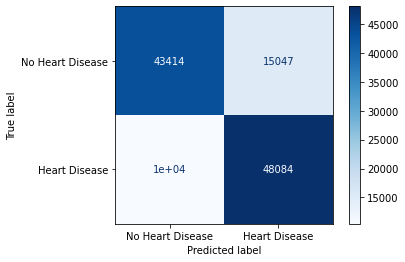

In [ ]:
disp = plot_confusion_matrix(model, X_test, y_test,
                              display_labels=['No Heart Disease','Heart Disease'],
                              cmap=plt.cm.Blues)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     58461
           1       0.76      0.82      0.79     58508

    accuracy                           0.78    116969
   macro avg       0.78      0.78      0.78    116969
weighted avg       0.78      0.78      0.78    116969



## XGB Модел на цело податочно множество

In [ ]:
model_o = xgb.XGBClassifier( objective = 'binary:logistic',
                            base_score=0.5, 
                            booster='dart',
                            reg_alpha=0, 
                            reg_lambda=1,
                            n_estimators=600,
                            learning_rate=0.5
                           )
model_o.fit(X_train_o, y_train_o)

XGBClassifier(booster='dart', learning_rate=0.5, n_estimators=600)

In [ ]:
y_pred2 = model_o.predict(X_test_o)

In [ ]:
print('Точност на предвидените тест податоци: {}'.format(accuracy_score(y_test_o,y_pred2)*100))

Точност на предвидените тест податоци: 91.49767820009693


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


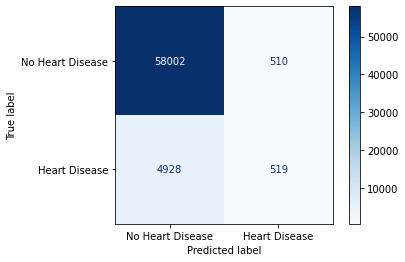

In [ ]:
disp = plot_confusion_matrix(model_o, X_test_o, y_test_o,
                              display_labels=['No Heart Disease','Heart Disease'],
                              cmap=plt.cm.Blues)

###Класификациски извештај

In [ ]:
print(classification_report(y_test_o, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58512
           1       0.50      0.10      0.16      5447

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.56     63959
weighted avg       0.89      0.91      0.89     63959

